# LWA1 Map - 80 MHz

Maps -- Filenames


lwa1_80mhz_map -- "lwa1_80mhz_map.fits"
lwa1_80mhz_noisemap -- "lwa1_80mhz_noisemap.fits"
lwa1_80mhz_maskmap -- "lwa1_80mhz_maskmap.fits"
lwa1_80mhz_beamcls -- "lwa1_80mhz_beam.fit"



Need:

param file
default file defining details about map
job submission file

telescope details:


declination, resolution, scan strategy, mapmaking

LWA1 

Sky maps released by the LWA1 group are in HEALPix sky pixelization for equatorial coordinates with an approximate pixel size of 0.23 degrees and in equatorial Mollweide projection with an approximate pixel size of 0.3 degrees.

Sources of uncertainties/errors: (Lukas email)

- temperature scale error
- Confusion limit ---> do not include in rms map


10-NOV-22 Meeting 


FOR LWA1 noise:
    look at output chi2 from comm --> reduced chi2 should be close to 1 (not 0.001 or 1000)
    data - signal model / standard deviation


LATEST LWA1 run:
    num chains              = 1
    num gibbs iterations    = 200

    sample amplitude        = true
    sample spectral indices = true

    gain sampling           = false

    bands                   =   (1) haslam 
                                (2) 80lwa1
    
    comps                   =   (1) synch 
                                (2) md 
                                (3) ff

In [1]:
import glob
from cmath import nan

import numpy as np
import healpy as hp
import matplotlib.pyplot as plt

from datetime import datetime
now = datetime.now()
# plt.rcParams['savefig.facecolor']='white'

## Create LWA1 maps for Commander input

In [2]:
def change_coord(m, coord):
    """ Change coordinates of a HEALPIX map

    Parameters
    ----------
    m : map or array of maps
      map(s) to be rotated
    coord : sequence of two character
      First character is the coordinate system of m, second character
      is the coordinate system of the output map. As in HEALPIX, allowed
      coordinate systems are 'G' (galactic), 'E' (ecliptic) or 'C' (equatorial)

    Example
    -------
    The following rotate m from galactic to equatorial coordinates.
    Notice that m can contain both temperature and polarization.
    >>>> change_coord(m, ['G', 'C'])
    """
    # Basic HEALPix parameters
    npix = m.shape[-1]
    nside = hp.npix2nside(npix)
    ang = hp.pix2ang(nside, np.arange(npix))

    # Select the coordinate transformation
    rot = hp.Rotator(coord=reversed(coord))

    # Convert the coordinates
    new_ang = rot(*ang)
    new_pix = hp.ang2pix(nside, *new_ang)

    return m[..., new_pix]

/astro/local/anaconda/envs/py38/lib/python3.8/site-packages/healpy/fitsfunc.py:391: UserWarning: NSIDE = 1024
  warnings.warn("NSIDE = {0:d}".format(nside))
/astro/local/anaconda/envs/py38/lib/python3.8/site-packages/healpy/fitsfunc.py:400: UserWarning: ORDERING = RING in fits file
  warnings.warn("ORDERING = {0:s} in fits file".format(ordering))
/astro/local/anaconda/envs/py38/lib/python3.8/site-packages/healpy/fitsfunc.py:428: UserWarning: INDXSCHM = IMPLICIT
  warnings.warn("INDXSCHM = {0:s}".format(schm))


[-3.0410454 -3.0410454 -3.0410454 ... -3.0410454 -3.0410454 -3.0410454]


/astro/local/anaconda/envs/py38/lib/python3.8/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(


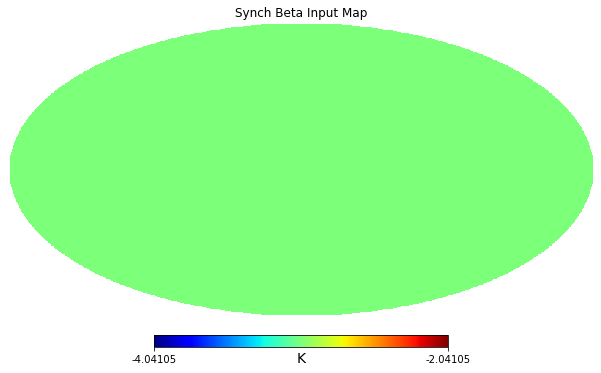

In [3]:
# Import lwa1-80 healpix map in equatorial coords
synch_beta_input_file = "/mn/stornext/d16/cmbco/AST9240/2022/data/init_synch_beta_BP8.1_v1.fits"
synch_beta_input_map = hp.fitsfunc.read_map(synch_beta_input_file, dtype=None)
print(synch_beta_input_map)

#
# Display the map to check if it's okay
#
hp.mollview(synch_beta_input_map, title="Synch Beta Input Map", cmap='jet', unit='K')
# hp.mollview(celest_lwa180/1000, min=0.9, max=4.5, coord=['C', 'G'], cmap='gist_heat', unit='kK')
# hp.mollview(map_lwa180/1000, min=0.9, max=4.5, coord=['C', 'G'], cmap='gist_heat')
# hp.mollview(map_lwa180, coord=['C', 'G'])
# hp.mollview(map_lwa180,  coord=['C', 'G'], norm="hist")

# #
# # Save the map as a fits file with the right name etc.
# #
# hp.fitsfunc.write_map("commander_inputs/lwa1_80mhz_map.fits", lwa1_80mhz_map, overwrite=True, dtype=None)

# # 
# # Save the map as a png image
# # 
# plt.savefig('map-images/lwa1_80mhz_map.png')

In [ ]:
# Import lwa1-80 healpix map in equatorial coords
file_C_lwa180 = "healpix-equat_coord_map-80.fits"
celest_lwa180 = hp.fitsfunc.read_map(file_C_lwa180, dtype=None)

###############################
# Random stuff I was trying
###############################
# hp.fitsfunc.write_map("healpix-galactic_coord_map-80.fits", celest_lwa180, coord='G', overwrite=True, dtype=None)
# file_G_lwa180 = "healpix-galactic_coord_map-80.fits"
# map_lwa180 = hp.fitsfunc.read_map(file_G_lwa180)
# rot_cg = hp.Rotator(coord="CG")
# map_lwa180 = rot_cg.rotate_map_pixel(celest_lwa180)
###############################

#
# Change coordinates from equatorial to galactic/celestial
#
lwa1_80mhz_map = change_coord(celest_lwa180, ['C', 'G'])
print("lwa1 map size:\n", lwa1_80mhz_map.size)

###############################
# 
# Doing these checks for bad pixels, aka pixel values <= 0.
# 
###############################
# Find the nan-valued pixels
idx_mask_sig = np.argwhere(np.isnan(lwa1_80mhz_map))
print("no. of nan pixels (to be masked):\n", idx_mask_sig.size)
# print("indices for nan pixels (to be masked):\n", idx_mask_sig)

# Find the <=0 pixels:
idx_badpix_sig = np.where(lwa1_80mhz_map <= 0) 
# The above is a tuple with at least 1 element, i.e. an empty array.
# So to check the size of the array contained by the tuple, I need to extract the array (as below)
idx_badpix_sig = idx_badpix_sig[0]
print("(1) no. of pixels <= 0:\n", idx_badpix_sig.size)
print("(2) no. of pixels <= 0:\n", (lwa1_80mhz_map <= 0).sum()) # This is another way to check for pixels valued <=0
# print("indices of pixels <= 0:\n", idx_badpix_sig)

# 
# if there are pixels <=0, we could set them to 'nan' as:
# lwa1_80mhz_map[idx_badpix_sig] = nan
# 

###############################
# 
# So far, there are no pixels <= 0, but there are quite a few that are nan-valued.
# I believe these are just the ones that are already greyed out (and therefore will be masked).
#
###############################

#
# Display the map to check if it's okay
#
hp.mollview(lwa1_80mhz_map, title="LWA1 80 MHz Original Survey Map", min=0.0, max=15000.0, cmap='jet', unit='K')
# hp.mollview(celest_lwa180/1000, min=0.9, max=4.5, coord=['C', 'G'], cmap='gist_heat', unit='kK')
# hp.mollview(map_lwa180/1000, min=0.9, max=4.5, coord=['C', 'G'], cmap='gist_heat')
# hp.mollview(map_lwa180, coord=['C', 'G'])
# hp.mollview(map_lwa180,  coord=['C', 'G'], norm="hist")

#
# Save the map as a fits file with the right name etc.
#
hp.fitsfunc.write_map("commander_inputs/lwa1_80mhz_map.fits", lwa1_80mhz_map, overwrite=True, dtype=None)

# 
# Save the map as a png image
# 
plt.savefig('map-images/lwa1_80mhz_map.png')

/astro/local/anaconda/envs/py38/lib/python3.8/site-packages/healpy/fitsfunc.py:391: UserWarning: NSIDE = 1024
  warnings.warn("NSIDE = {0:d}".format(nside))
/astro/local/anaconda/envs/py38/lib/python3.8/site-packages/healpy/fitsfunc.py:400: UserWarning: ORDERING = RING in fits file
  warnings.warn("ORDERING = {0:s} in fits file".format(ordering))
/astro/local/anaconda/envs/py38/lib/python3.8/site-packages/healpy/fitsfunc.py:428: UserWarning: INDXSCHM = IMPLICIT
  warnings.warn("INDXSCHM = {0:s}".format(schm))


(array([-3.0410454, -3.0410454, -3.0410454, ..., -3.0410454, -3.0410454,
       -3.0410454], dtype=float32), [('XTENSION', 'BINTABLE'), ('BITPIX', 8), ('NAXIS', 2), ('NAXIS1', 12288), ('NAXIS2', 12288), ('PCOUNT', 0), ('GCOUNT', 1), ('TFIELDS', 3), ('TTYPE1', 'TEMPERATURE'), ('TFORM1', '1024E'), ('TTYPE2', 'Q_POLARISATION'), ('TFORM2', '1024E'), ('TTYPE3', 'U_POLARISATION'), ('TFORM3', '1024E'), ('PIXTYPE', 'HEALPIX'), ('ORDERING', 'RING'), ('EXTNAME', 'xtension'), ('NSIDE', 1024), ('FIRSTPIX', 0), ('LASTPIX', 12582911), ('INDXSCHM', 'IMPLICIT'), ('OBJECT', 'FULLSKY')])


TypeError: input maps have different npix


BEFORE NAN-ing bad-pixels:
no. of nan pixels (to be masked):
 140798
(1) no. of pixels <= 0:
 167
(2) no. of pixels <= 0:
 167
[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1.]

AFTER NAN-ing bad pixels:
(1) no. of pixels <= 0:
 0
(2) no. of pixels <= 0:
 0
no. of nan pixels (to be masked):
 140965
383.37344
nan


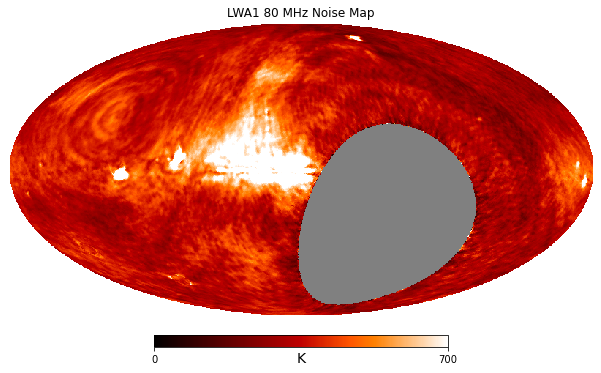

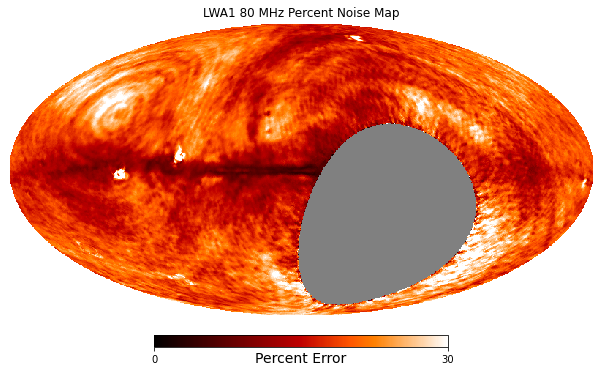

In [4]:
file_noise_C_lwa180 = "healpix-all-sky-rav-wsclean-err-80.fits"
noise_C_lwa180 = hp.fitsfunc.read_map(file_noise_C_lwa180, dtype=None)
lwa1_80mhz_noisemap = change_coord(noise_C_lwa180, ['C', 'G'])

###############################
# 
# Doing these checks for bad pixels, aka pixel values <= 0.
# 
###############################
print("\nBEFORE NAN-ing bad-pixels:")
#
# Find the nan-valued pixels
#
idx_mask_noise = np.argwhere(np.isnan(lwa1_80mhz_noisemap))
print("no. of nan pixels (to be masked):\n", idx_mask_noise.size)
# print("indices for nan pixels (to be masked):\n", idx_mask_noise)

#
# Find the <=0 pixels:
#
idx_badpix_noise = np.where(lwa1_80mhz_noisemap <= 0)
# The above is a tuple with at least 1 element, i.e. an empty array.
# So to check the size of the array contained by the tuple, I need to extract the array (as below)
idx_badpix_noise = idx_badpix_noise[0]
print("(1) no. of pixels <= 0:\n", idx_badpix_noise.size)
print("(2) no. of pixels <= 0:\n", (lwa1_80mhz_noisemap <= 0).sum()) # This is another way to check for pixels valued <=0
# print("indices of pixels <= 0:\n", idx_badpix_noise)

#
# if there are pixels <=0 (and there are quite a few!), we set them to 'nan' as: 
#
print(lwa1_80mhz_noisemap[idx_badpix_noise])
lwa1_80mhz_noisemap[idx_badpix_noise] = nan

#
# Now check again to see if there are any bad pixels left...
#
idx_badpix_noise = np.where(lwa1_80mhz_noisemap <= 2)[0]
print("\nAFTER NAN-ing bad pixels:")
print("(1) no. of pixels <= 0:\n", idx_badpix_noise.size)
print("(2) no. of pixels <= 0:\n", (lwa1_80mhz_noisemap <= 0).sum()) # This is another way to check for pixels valued <=0
# print("indices of pixels <= 0:\n", idx_badpix_noise)

# 
# Now we update our array of indices for nan-pixels
# 
idx_mask_noise = np.argwhere(np.isnan(lwa1_80mhz_noisemap))
print("no. of nan pixels (to be masked):\n", idx_mask_noise.size)

# print(lwa1_80mhz_noisemap[idx_badpix_noise])

###############################
# 
# So far, there are ???
#
###############################


print(np.mean(np.delete(lwa1_80mhz_noisemap, idx_mask_noise)))
print(np.mean(lwa1_80mhz_noisemap))

# lwa1_80mhz_noisemap[:] = np.mean(np.delete(lwa1_80mhz_noisemap, idx_mask_noise))



#
# Display the noise map to check if it's okay
#
hp.mollview(lwa1_80mhz_noisemap, title="LWA1 80 MHz Noise Map", min=0.0, max=700, cmap='gist_heat', unit='K')
# Save the map as a fits file with the right name etc.

hp.fitsfunc.write_map("commander_inputs/lwa1_80mhz_noisemap.fits", lwa1_80mhz_noisemap, overwrite=True, dtype=None)

#
# Create PERCENT-NOISE map from the noise map
#
percentnoise_lwa180 = lwa1_80mhz_noisemap/lwa1_80mhz_map * 100
#
# Display the percent-noise map to check if it's okay
#
hp.mollview(percentnoise_lwa180, title="LWA1 80 MHz Percent Noise Map", min=0.0, max=30.0, cmap='gist_heat', unit='Percent Error')

# 
# Save both the noise maps as a png images
# 
plt.savefig('map-images/lwa1_80mhz_noisemap.png')
plt.savefig('map-images/percentnoise_lwa180.png')


# print(lwa1_80mhz_noisemap.min())

The noise mask is bigger than the intensity map mask (i.e. the intensity mask is a SUBSET of the noise mask), so probably better to create the mask map using the noise map.

In [5]:
print(idx_mask_sig.size, idx_mask_noise.size)
# Check if there are any mask-pix in the intensity map that are not in the noise map
sigdiffnoise = np.setdiff1d(idx_mask_sig, idx_mask_noise)
print(sigdiffnoise.size)
# Check if there are any mask-pix in the noise map that are not in the intensity map
noisediffsig = np.setdiff1d(idx_mask_noise, idx_mask_sig)
print(noisediffsig.size)
# np.where(idx_mask_sig != idx_mask_noise)



#
# So the mask we'll use is the noise map mask:
#
lwa1_80mhz_map[noisediffsig] = nan
idx_mask = idx_mask_noise

#
# Save the map as a fits file with the right name etc.
#
hp.fitsfunc.write_map("commander_inputs/lwa1_80mhz_map.fits", lwa1_80mhz_map, overwrite=True, dtype=None)

140798 140965
0
167


In [6]:
goodmask_sig = hp.mask_good(lwa1_80mhz_map)
goodmask_noise = hp.mask_good(lwa1_80mhz_noisemap)
idxnmask = np.where(goodmask_noise==False)[0]
idxsmask = np.where(goodmask_sig==False)[0]
print(idxnmask.size)
print(idxsmask.size)
lwa1_80mhz_maskmap_small = goodmask_sig.astype(int)
lwa1_80mhz_maskmap_big = goodmask_noise.astype(int)
# lwa1_80mhz_maskmap[idx_badpix_noise] = 0

hp.fitsfunc.write_map("commander_inputs/lwa1_80mhz_maskmap.fits", lwa1_80mhz_maskmap_big, overwrite=True, dtype=None)

# hp.mollview(lwa1_80mhz_maskmap)

140965
140965


/astro/local/anaconda/envs/py38/lib/python3.8/site-packages/healpy/fitsfunc.py:99: FutureWarning: The default dtype of write_cl() will change in a future version: explicitly set the dtype if it is important to you
  warnings.warn(


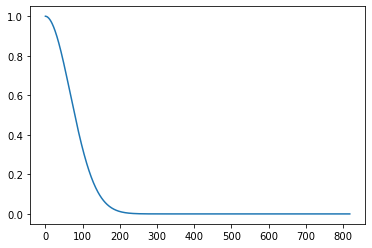

In [7]:
# 
# find fwhm: beamsize*2*pi/180
# lmax: nside*3 - 1 (but add some here)
# compute blms using healpy.spherfunc.gauss_beam with fwhm and lmax as input
# healpy write cls to fits file
# 

beamsize = 2.0
fwhm = 2.0*np.pi/180
nside = 256
lmax = nside * 3 + 50
lwa1_80mhz_beamcls = hp.sphtfunc.gauss_beam(fwhm=fwhm, lmax=lmax)

hp.fitsfunc.write_cl(filename='commander_inputs/lwa1_80mhz_beam.fit', cl=lwa1_80mhz_beamcls, overwrite=True, dtype=None)

x = range(lwa1_80mhz_beamcls.size)
plt.plot(x, lwa1_80mhz_beamcls)

In [8]:
# What was this again??
hp.fit_dipole(lwa1_80mhz_map, bad=nan)

(2214.003599620877, array([893.18359529, 507.1652158 , -16.81614988]))

## Maps produced by Commander run

In [9]:
date = now.strftime("%y%m%d")
print(date)

221110


In [10]:
file_list = glob.glob('*.*')

In [13]:
nchain = 1
totaliter = 100
comp = "020406"
band = "005017"
op = "samp11"
run_str = op+f"_band{band}_comp{comp}_c{nchain}_k{totaliter}"
dir_comm = f"/mn/stornext/d16/cmbco/AST9240/2022/jibran/commander-outputs/"+run_str+"/"


k = 100
file_list = glob.glob(dir_comm+f"*100.fits")
print(file_list)
file_comm_synch_lwa180 = file_list[3]
file_comm_res_lwa180 = file_list[2]
file_comm_synch = file_list[5]
file_comm_ff = file_list[-1]

# file_comm_synch_lwa180 = dir_comm+f"synch_80MHz-LWA1*{k}.fits"
# file_comm_res_lwa180 = dir_comm+f"res_80MHz-LWA1*{k}.fits"
# file_comm_synch = dir_comm+f"synch_c*{k}.fits"
# file_comm_ff = dir_comm+f"ff_80MHz-LWA1*{k}.fits"

# file_comm_synch_lwa180 = "commander_outputs/221027-commout/synch_80MHz-LWA1_c0001_k000010.fits" # what is the difference between this and just synch
# file_comm_res_lwa180 = "commander_outputs/221027-commout/res_80MHz-LWA1_c0001_k000010.fits" # residual map... but residual between what and what?
# file_comm_synch = "commander_outputs/221027-commout/synch_c0001_k000010.fits"
# file_comm_ff = "commander_outputs/221027-commout/ff_80MHz-LWA1_c0001_k000010.fits" # free-free emission map


# file_comm_synch_lwa180_old = "commander_outputs/commander5/synch_80MHz-LWA1_c0001_k000005.fits" # what is the difference between this and just synch
# file_comm_res_lwa180_old = "commander_outputs/commander5/res_80MHz-LWA1_c0001_k000005.fits" # residual map... but residual between what and what?
# file_comm_synch_old = "commander_outputs/commander5/synch_c0001_k000005.fits"
# file_comm_ff_old = "commander_outputs/commander5/ff_80MHz-LWA1_c0001_k000005.fits" # free-free emission map


['/mn/stornext/d16/cmbco/AST9240/2022/jibran/commander-outputs/samp11_band005017_comp020406_c1_k100/ff_c0001_k000100.fits', '/mn/stornext/d16/cmbco/AST9240/2022/jibran/commander-outputs/samp11_band005017_comp020406_c1_k100/chisq_c0001_k000100.fits', '/mn/stornext/d16/cmbco/AST9240/2022/jibran/commander-outputs/samp11_band005017_comp020406_c1_k100/res_80MHz-LWA1_c0001_k000100.fits', '/mn/stornext/d16/cmbco/AST9240/2022/jibran/commander-outputs/samp11_band005017_comp020406_c1_k100/synch_80MHz-LWA1_c0001_k000100.fits', '/mn/stornext/d16/cmbco/AST9240/2022/jibran/commander-outputs/samp11_band005017_comp020406_c1_k100/ff_0.4-Haslam_c0001_k000100.fits', '/mn/stornext/d16/cmbco/AST9240/2022/jibran/commander-outputs/samp11_band005017_comp020406_c1_k100/synch_c0001_k000100.fits', '/mn/stornext/d16/cmbco/AST9240/2022/jibran/commander-outputs/samp11_band005017_comp020406_c1_k100/ff_Te_c0001_k000100.fits', '/mn/stornext/d16/cmbco/AST9240/2022/jibran/commander-outputs/samp11_band005017_comp020406_c

/astro/local/anaconda/envs/py38/lib/python3.8/site-packages/healpy/fitsfunc.py:368: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  warnings.warn(
/astro/local/anaconda/envs/py38/lib/python3.8/site-packages/healpy/fitsfunc.py:391: UserWarning: NSIDE = 256
  warnings.warn("NSIDE = {0:d}".format(nside))
/astro/local/anaconda/envs/py38/lib/python3.8/site-packages/healpy/fitsfunc.py:400: UserWarning: ORDERING = RING in fits file
  warnings.warn("ORDERING = {0:s} in fits file".format(ordering))
/astro/local/anaconda/envs/py38/lib/python3.8/site-packages/healpy/fitsfunc.py:428: UserWarning: INDXSCHM = IMPLICIT
  warnings.warn("INDXSCHM = {0:s}".format(schm))
/astro/local/anaconda/envs/py38/lib/python3.8/site-packages/healpy/fitsfunc.py:391: UserWarning: NSIDE = 102

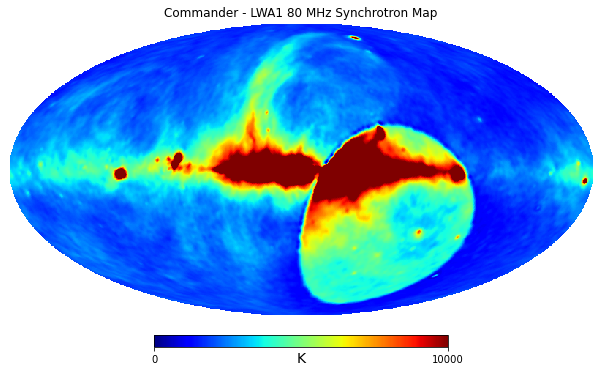

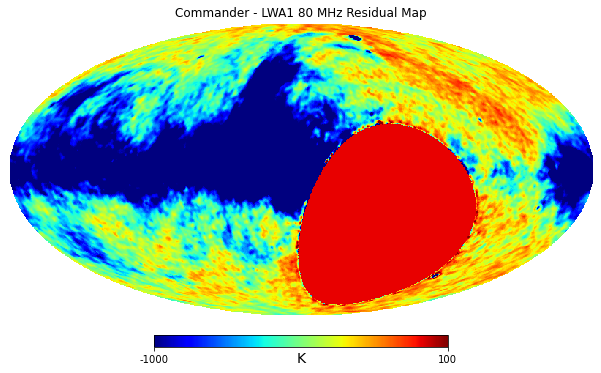

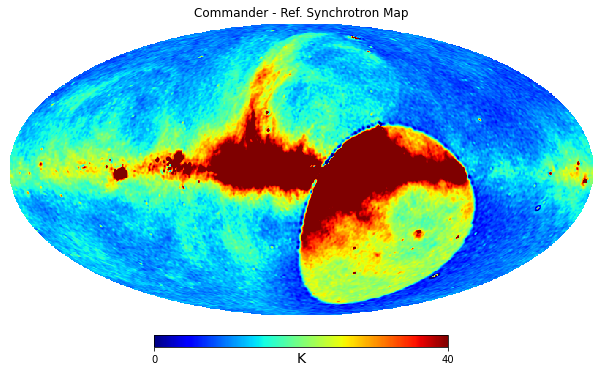

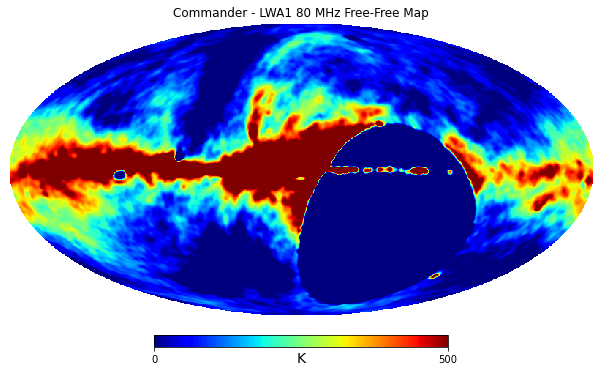

In [20]:
# synch_80MHz_LWA1_comm_old = hp.fitsfunc.read_map(file_comm_synch_lwa180_old)
# res_80MHz_LWA1_comm_old = hp.fitsfunc.read_map(file_comm_res_lwa180_old)
# synch_comm_old = hp.fitsfunc.read_map(file_comm_synch_old)
# ff_80MHz_LWA1_comm_old = hp.fitsfunc.read_map(file_comm_ff_old)

synch_80MHz_LWA1_comm = hp.fitsfunc.read_map(file_comm_synch_lwa180)
res_80MHz_LWA1_comm = hp.fitsfunc.read_map(file_comm_res_lwa180)
synch_comm = hp.fitsfunc.read_map(file_comm_synch)
ff_80MHz_LWA1_comm = hp.fitsfunc.read_map(file_comm_ff)

date = now.strftime("%y%m%d")
filename = 'temp_{date}'.format(date=date)

hp.mollview(synch_80MHz_LWA1_comm, title="Commander - LWA1 80 MHz Synchrotron Map", min=0.0, max=10000.0, cmap='jet', unit='K')
# hp.mollview(res_80MHz_LWA1_comm/1000, title="Commander - LWA1 80 MHz Residual Map", cmap='jet', unit='kK')
plt.savefig(f'map-images/{date}-'+run_str+'-synch_80lwa1-comm.png')

hp.mollview(res_80MHz_LWA1_comm, title="Commander - LWA1 80 MHz Residual Map", cmap='jet', min=-1000, max=100, unit='K')
plt.savefig(f'map-images/{date}-'+run_str+'-res_80lwa1-comm.png')

hp.mollview(synch_comm/(10**6), title="Commander - Ref. Synchrotron Map", min=0.0, max=40.0, cmap='jet', unit='K')
plt.savefig(f'map-images/{date}-'+run_str+'-synch_comm.png')

hp.mollview(ff_80MHz_LWA1_comm, title="Commander - LWA1 80 MHz Free-Free Map", min=0.0, max=500.0, cmap='jet', unit='K')
plt.savefig(f'map-images/{date}-'+run_str+'-ff_80lwa1-comm.png')


# hp.mollview(synch_80MHz_LWA1_comm_old, title="OLD Commander - LWA1 80 MHz Synchrotron Map", min=0.0, max=15000.0, cmap='jet', unit='K')
# hp.mollview(res_80MHz_LWA1_comm_old, title="OLD Commander - LWA1 80 MHz Residual Map", cmap='jet', min=-5000, max=5000, unit='K')
# hp.mollview(synch_comm_old/(10**6), title="OLD Commander - Ref. Synchrotron Map", min=0.0, max=100.0, cmap='jet', unit='K')
# hp.mollview(ff_80MHz_LWA1_comm_old, title="OLD Commander - LWA1 80 MHz Free-Free Map", min=0.0, max=5000.0, cmap='jet', unit='K')

# hp.mollview(map_lwa180/1000, min=0.9, max=4.5, coord=['C', 'G'], cmap='gist_heat')
# hp.mollview(map_lwa180, coord=['C', 'G'])
# hp.mollview(map_lwa180,  coord=['C', 'G'], norm="hist")

In [ ]:

# file_commander_lwa180 = "other-outputs/synch_35MHz-LWA1_c0001_k000001.fits"
# synch_80MHz_LWA1_comm = hp.fitsfunc.read_map(file_commander_lwa180)

# hp.mollview(synch_80MHz_LWA1_comm, cmap='gist_heat')
# # hp.mollview(map_lwa180/1000, min=0.9, max=4.5, coord=['C', 'G'], cmap='gist_heat')
# # hp.mollview(map_lwa180, coord=['C', 'G'])
# # hp.mollview(map_lwa180,  coord=['C', 'G'], norm="hist")

look at output chi2 from comm --> reduced chi2 should be close to 1 (not 0.001 or 1000)

data - signal model / standard deviation